# Workshop 6: Train and visualize a Simple Word2Vec Model with Gensim
Train Word2Vec on a small sample corpus and explore word vectors.

In [3]:
!pip install --upgrade numpy
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached gensim-4.3.3-cp311-cp311-macosx_11_0_arm64.whl (24.0 MB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attemp

In [1]:
from gensim.models import Word2Vec

sentences = [
    ["cat", "say", "meow"],
    ["dog", "say", "woof"],
    ["bird", "say", "tweet"],
    ["cat", "and", "dog", "are", "friends"]
]

model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, workers=2, epochs=100)

print("Vector for 'cat':", model.wv['cat'])
print("Most similar to 'cat':", model.wv.most_similar('cat'))


Vector for 'cat': [-0.0172525   0.00732504  0.01034875  0.01148291  0.0149413  -0.01237602
  0.0022465   0.01212272 -0.0057725  -0.01233181 -0.00083481 -0.01679833
 -0.01118479  0.01421705  0.00670418  0.01453331  0.01373656  0.0151746
 -0.00765831 -0.00108949  0.00471862 -0.00903937  0.01684816 -0.01976309
  0.01359567  0.00584295 -0.00983088  0.00887121 -0.00351555  0.01339706
  0.01991959 -0.00879222 -0.00119719 -0.01144503  0.00766576  0.00552675
  0.0138467   0.01214196  0.01914992  0.01855967  0.01578026 -0.0139826
 -0.0182968  -0.0007645  -0.00612632  0.01587773  0.01193246 -0.0031183
  0.00302824  0.00360791]
Most similar to 'cat': [('are', 0.16737236082553864), ('woof', 0.13893157243728638), ('say', 0.12933743000030518), ('tweet', 0.08994321525096893), ('dog', 0.01348231639713049), ('and', -0.02408740110695362), ('meow', -0.035606998950242996), ('friends', -0.1529558300971985), ('bird', -0.21665753424167633)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [4]:
glove_file = datapath('/Users/veerasakkritsanapraphan/Downloads/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/var/folders/_b/_c0t1fln50qc89tn73q7jhbm0000gn/T/ipykernel_66859/597780120.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851963639259338),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930821418762),
 ('kerry', 0.7472624182701111)]

In [7]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.705482542514801),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629635691642761),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349172592163086),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [9]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [10]:
analogy('japan', 'japanese', 'australia')

'australian'

In [11]:
analogy('australia', 'beer', 'france')

'champagne'

In [12]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [13]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

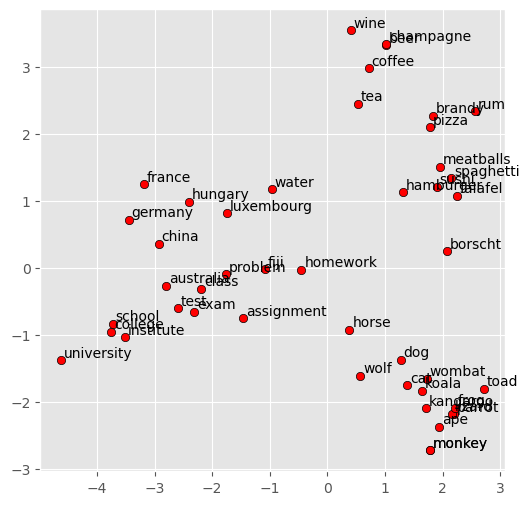

In [14]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])